# Derek Jeter: The Greatest Position Player of All Time?

Derek Jeter is one of the most well-known baseball players ever, and played his entire 20 year career for the New York Yankees. Jeter was a 14 time all star, accured 5 silver slugger awards, 5 gold gloves, and was the 28th memmber of the 3,000 hit club. Most importantly, Jeter was known for his ability to perform in the clutch, helping the Yankees win 5 World Series titles and eventually had his number (2) retired at Yankee stadium.

In total, Jeter ended his illustrious career with 2747 games played, 

After his playing career ended, Jeter was nominated for the Hall of Fame, baseball's most exclusive club that currently holds 235 former players. The Hall fo Fame includes names such as Babe Ruth, Hank Aaron, Cy Young, and many others who are considered to be the best players to ever step foot on a diamond.  To be approved for entry, a player can be inducted in one of two ways. First, a nominated player will be voted on by the The Baseball Writers Association (BBWAA), and at least 75% of the writers must include said player on their ballot for them to be inducted. The other way is the Veterans Committee, which considers players who were not originally inducted by the BBWAA, but the committee believes a mistake was made. 

In Derek Jeter's first year on the Hall of Fame ballot, he was included on 99.7% of the BBWAA's ballots, the highest ever recorded by a position player (non-pitcher) and one vote shy of being unamimous. This is well above the threshold to be inducted, and is a higher percentage than recieved by the likes of Babe Ruth, Hank Aaron, or andyone else. This leads many to believe that Derek Jeter was the greatest position player of all time, since the highest percentage of qualified baseball writers deemed him worthy of induction. 

With this being said, the question we are examining is: 

Did the voters get it right? Was Derek Jeter actually the best position player ever.



To answer this question, we must first ask ourselves: What makes someone a great baseball player. This is somewhat subjective, however we will use the examination techniques used by many MLB scouts when examining a prospective MLB player. There are four major criteria by which a player is judged:

1. Hitting for Contact
2. Hitting for Power
3. Fielding Ability
4. Speed

For someone to be considered the best player ever, we would expect Derek Jeter's stats to be above average in all four of these criteria. However, in this case, "average" should not be the average MLB player during his playing years, he should perform significantly above average among hall of famers as well. Thus, the data we will be examining in our project will compare Jeter's statistics to other Hall of Famers inducted by the BBWAA, since we are examining whether the voters were correct in their analysis of Jeter. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

# Gathering the Data

For our project, we will use the same resource as used in the Moneyball project, "Lahman's Baseball Database". However, we will use the file from 2020 rather than 2014 so we can make sure all of Jeters stats can be grabbed. Not only does this sqlite database have Jeter's stats, but also has the stats for each player inducted into the Hall of Fame. This is very convienent, as we desire to compare Jeter's stats against other hall of Famers. However, after playing around with the table we notice that Jeter is not included in this Hall of Fame table, so we need to work around that. Each player in the Hall of Fame table contains their own playerID that is unique, and the Hall of Fame Table does not include batting or fielding statistics for the hall of famers.


This is where the batting and fielding tables come in. These tables each contains hitting and fielding statistics for each player for each year from 1871-2020. However, we want to examine each of the players career stats, which is why we must group each of our select statements by player, and take the sum of their yearly statistics. This will give us the total batting and fielding information for a player over his whole career. 

We used similar methods that we used in project 2 to grab the data, using SQL select statements and grouping. When we are grabbing the data from the Hall of Fame table, we include a "WHERE" clasuse because we are only concerned with the players who were inducted into the Hall of Fame by the BBWAA, rather than the Veterans Committee. We also wanted to make sure we are only including the players who were actually inducted, which is why the "inducted=Y" is included. We will also grab the battlots and votes for each hall of famer, so we can calculate their vote percentage to be compared with Jeter. For the batting and fielding tables, we group by playerID so we can sum all the total statistics for each year for a single player, giving us career statistics. 

In [2]:
# #Grabbing the database file and connecting
sqlite_file = 'lahmansbaseballdb.sqlite'
conn = sqlite3.connect(sqlite_file)

# Selecting the playerID to combine with their statistics in the batting and fiedling tables, along with the votes cast for them. Making sure we only grab the players who were inducted by the BBWAA and not the Veterans Committe. 
HOF_query = 'SELECT playerID,ballots,votes from HallOfFame WHERE votedBy="BBWAA" AND inducted="Y"'

#Getting the carreer batting statistics for every player from 1871-2020, summing all the major hatting categories to get career numbers in each of those areas. Also getting some running (SB) numbers since that is an area that determines how good a plyer is
batting_reg_query = "SELECT playerID,SUM(H) as total_hits, SUM(AB), SUM(HR),SUM([2B]), SUM([3B]),SUM(BB),SUM(HBP), SUM(SB) from Batting GROUP BY playerID"

# Getting career statistics for all the major fielding categories, along with their playerID and position. 
fielding_reg_query = 'SELECT playerID, Pos, SUM(G), SUM(PO), SUM(A), SUM(E) from Fielding GROUP BY playerID'

# # Reading the SQL to create the 3 dataframes
reg_batting = pd.read_sql(batting_reg_query, conn)
reg_fielding = pd.read_sql(fielding_reg_query, conn)
hallOfFame = pd.read_sql(HOF_query,conn)

# Meaning of Batting Terms:


At Bat (AB): When a batter reaches base via a fielder's choice, hit or an error (not including catcher's interference) or when a batter is put out on a non-sacrifice. 

Homerun (HR): When a batter hits a fair ball and scores on the play without being put out or without the benefit of an error.

Hit (H): When a batter strikes the baseball into fair territory and reaches base without doing so via an error or a fielder's choice.

Double (2B): When a batter hits the ball into play and reaches second base without the help of an intervening error or attempt to put out another baserunner.

Triple (3B): When a batter hits the ball into play and reaches third base without the help of an intervening error or attempt to put out another baserunner.

Total Base (TB): The number of bases gained by a batter through his hits. A batter records one total base for a single, two total bases for a double, three total bases for a triple and four total bases for a home run.

Intentional Walk (BB): When the defending team elects to walk a batter on purpose, putting him on first base instead of letting him try to hit.

Hit-By-Pitch (HBP): When a batter is struck by a pitched ball without swinging at it. He is awarded first base as a result. 

Stolen Base (SB): When a baserunner advances by taking a base to which he isn't entitled. 

# Meaning of Fielding Terms:

Position (POS): The position of a player on a team.

Games Played (G): A player is credited with having played a game if he appears in it at any point -- be it as a starter or a replacement. It's important to note that the player doesn't necessarily need an at-bat.

Putout (P): When the fielder physically records the act of completing an out -- whether it be by stepping on the base for a forceout, tagging a runner, catching a batted ball, or catching a third strike.

Assist (A): A fielder who touches the ball before a putout is recorded by another fielder.

Error (E): A fielder is given an error if, in the judgment of the official scorer, he fails to convert an out on a play that an average fielder should have made.

In [3]:
# Creating a new column in the Hall Of Fame dataframe called vointg percentage, so we can see the percentages other great players recieved by the BBWAA in their election process.

hallOfFame['Vote%'] = hallOfFame['votes']/hallOfFame['ballots'] * 100
# # Grab the voting percentage of each hall of famer by taking the number of votes,
# # Dividing it by number of ballets, and multiplying by 100.
hallOfFame.drop(['votes','ballots'],axis=1,inplace=True)
# # No longer need the votes or ballots columns, can drop those
hallOfFame

,playerID,Vote%
0,cobbty01,98.230088
1,ruthba01,95.132743
2,wagneho01,95.132743
3,mathech01,90.707965
4,johnswa01,83.628319
...,...,...
118,rodriiv01,76.018100
119,jonesch06,97.156398
120,guerrvl01,92.890995
121,thomeji01,89.810427


# Combining the Data 

Now that we have three dataframes (Hitting, Fielding, and Hall of Famers) and each datafram contains a primary key (playerID), we want to merge these dataframes together to get the hitting and fielding career only for Hall of Famers, since that is who we are comparing Jeter against (Since Hall Of Famers are considered the best players fo all time). So, we first perform an inner join of the fielding and hitting stat dataframes to get the overall player statistics, and only keep the entries that have playerID codes in both the hitting and fielding tables. 

We call this datafame reg_stats, and then perform another inner join on the reg_stats and hall of fame Dataframe. We once again only keep the entries that have playerID keys in both tables, as that will give us the career stats of all the Hall of Fame players.

However, as stated previously, Derek Jeter was not included in the Hall of Fame table due to his recent induction, so we create a mini dataframe called jeter that contains the reg_stats of Derek Jeter. Once we have merged the reg_stats and Hall of Fame dataframes, we can simply append the Jeter Dataframe to add him to the list of Hall of Famers, with his career stats. our final dataframe, that contains the career hitting and fielding statistics of all the Hall of Famers (and Derek Jeter) is called reg_HOF_stats.

* As we merge, we are renaming the columns to make them easier to distinguish


In [4]:
reg_stats = pd.merge(reg_fielding,reg_batting, on=['playerID'])
reg_stats.columns = ['playerID','POS','GP','PO','A','E','H','AB','HR','DBL','TPL','BB','HBP','SB']
reg_stats

# # Merge the fielding and batting statistics into one dataframe, grouped by player. 
# # Allows for comprehensive statistics on individual players

,playerID,POS,GP,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,aardsda01,P,331,11,29,3.0,0,4,0,0,0,0,0.0,0.0
1,aaronha01,OF,3020,7436,429,144.0,3771,12364,755,624,98,1402,32.0,240.0
2,aaronto01,1B,387,1317,113,22.0,216,944,13,42,6,86,0.0,9.0
3,aasedo01,P,448,67,135,13.0,0,5,0,0,0,0,0.0,0.0
4,abadan01,1B,9,37,1,1.0,2,21,0,0,0,4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19486,zupofr01,C,13,31,1,2.0,3,18,0,1,0,2,0.0,0.0
19487,zuvelpa01,SS,201,267,415,23.0,109,491,2,17,2,34,2.0,2.0
19488,zuverge01,P,265,45,145,7.0,21,142,0,2,1,9,0.0,0.0
19489,zwilldu01,OF,342,755,37,25.0,364,1280,30,76,15,128,4.0,46.0


In [5]:
jeter = reg_stats.loc[reg_stats['playerID'] == 'jeterde01']
# # Takes only Derek Jeter's stats from the above dataframe.
# Since Derek Jeter is not included within the Hall of fame table, we need to make our own row for Jeter tha includes his accumulated statstics  

In [6]:
reg_HOF_stats = pd.merge(hallOfFame,reg_stats,on='playerID')
reg_HOF_stats

# # Takes the intersect of the players in the MLB HOF and their stats from the above dataframe.

,playerID,Vote%,POS,GP,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,cobbty01,98.230088,OF,2954,6507,410,278.0,4189,11436,117,724,295,1249,94.0,896.0
1,ruthba01,95.132743,P,2436,4787,569,179.0,2873,8398,714,506,136,2062,43.0,123.0
2,wagneho01,95.132743,2B,2777,7940,6782,828.0,3420,10439,101,643,252,963,125.0,723.0
3,mathech01,90.707965,P,643,313,1506,57.0,362,1687,7,50,12,116,17.0,20.0
4,johnswa01,83.628319,P,815,292,1352,53.0,547,2324,24,94,41,110,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,rodriiv01,76.018100,C,2436,14922,1233,143.0,2844,9592,311,572,51,513,58.0,127.0
119,jonesch06,97.156398,SS,2405,1771,3581,243.0,2726,8984,468,549,38,1512,18.0,150.0
120,guerrvl01,92.890995,OF,1608,3169,126,125.0,2590,8155,449,477,46,737,103.0,181.0
121,thomeji01,89.810427,3B,1599,9450,1565,137.0,2328,8422,612,451,26,1747,69.0,19.0


In [7]:
reg_HOF_stats = reg_HOF_stats.append(jeter)
# Add Jeter to the HOF stats dataframe, since Jeter was not inducted into it until 2020 and was not included in the Hall of Fame Table

In [8]:
pd.set_option('display.max_rows', 100)

# Performing a Mini Clean of the Data

Since we are only examining whether Derek Jeter was the best position player of all time, we can eliminate all non-position players (Pitchers) from our Dataframe. It is almost impossible to measure up the impact of a pitcher versus a position player in baseball, since they perform such different tasks. Even the best baseball data-science minds cannot figure this one out!

In [9]:
# Grabbing a subset of the dataframe, which is all the non-pitchers, since we only want to compare Jeter against other position players
reg_HOF_stats = reg_HOF_stats[(reg_HOF_stats.POS != 'P')]
reg_HOF_stats.head(10)

,playerID,Vote%,POS,GP,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,cobbty01,98.230088,OF,2954,6507,410,278.0,4189,11436,117,724,295,1249,94.0,896.0
2,wagneho01,95.132743,2B,2777,7940,6782,828.0,3420,10439,101,643,252,963,125.0,723.0
5,lajoina01,83.582090,1B,2441,8520,6691,518.0,3243,9590,82,657,163,516,134.0,380.0
6,speaktr01,82.089552,OF,2717,6935,462,224.0,3514,10195,117,792,222,1381,103.0,432.0
9,sislege01,85.766423,1B,2036,18914,1573,274.0,2812,8267,102,425,164,472,48.0,375.0
10,collied01,77.737226,2B,2701,6621,7716,452.0,3315,9949,47,438,187,1499,77.0,741.0
11,keelewi01,75.547445,3B,2104,3170,363,167.0,2932,8591,33,241,145,524,129.0,495.0
12,hornsro01,78.111588,SS,2164,4495,6842,500.0,2930,8173,301,541,169,1038,48.0,135.0
14,friscfr01,84.472050,2B,2296,4918,7170,371.0,2880,9112,105,466,138,728,31.0,419.0
15,cochrmi01,79.503106,C,1452,6414,840,111.0,1652,5169,119,333,64,857,29.0,64.0


# Criteria 1: Hitting for Contact

The first criteria we want to examine is whether Derek Jeter was significantly better at getting hits than all other hall of famers. Obviously, the best hitter is not necesssarily the hitter who accumulates the most hits over his career, since much of that is dependant on how many games he played. The more games played, the more opportunties a plyer had to get a hit. Thus, you would expect to see more hits from a player who got more opportunities to get a hit. In baseball, At-Bats (labeled as AB) in our Dataframe measures exactly that: The number of times the player had to get a hit.

We decided to create a scatterplot with At-Bats on the x-axis and hits on the y-axis. We will plot each of the Hall Of Famers, including Derek Jeter. Since we know there is a linear relationship between the two (more opportunities = more hits) we can run a linear regression to see where Derek Jeter lies in comparison. This is very similar to what we did in project 2, as we are examining the "expected" amount of hits a player should get given the amount At-Bats. If Derek actually was one of the best "hitters" ever, we would expect to see him acurrue many more hits than expected. 

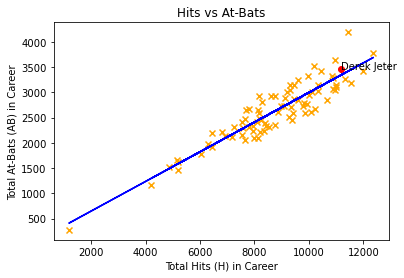

Intercept:  0.2934904646718791  Slope:  60.2981702289741


In [10]:
# Making a scatterplot of Hits vs At-Bats
for k1,v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['AB'],y=v1['H'],c='red')
        plt.annotate('Derek Jeter',(v1['AB'],v1['H']))
        #Specifically marks Jeter as red
    else:
        plt.scatter(marker='x',x=v1['AB'],y=v1['H'],c='orange')
        #Marks the rest as orange
        
#Creates a linear regression out of the data, as mentioned above
x = reg_HOF_stats['AB']
y = reg_HOF_stats['H']
m,b = np.polyfit(x,y,1)

#Plots the data onto a scatter plot with regression line
plt.xlabel('Total Hits (H) in Career')
plt.ylabel('Total At-Bats (AB) in Career')
plt.title('Hits vs At-Bats')
plt.plot(x, m*x+b, '-', color='blue')
plt.show()
print("Intercept: ", m, " Slope: ", b)

Next, we want to make a linear regression model from the above statistics in order to see the residuals. We will do this using SK-Learn's LinearRegression function. To calculate the residuals, we subtract the predicted hits from the model from the actual hits each player made. 

In [11]:
x = pd.DataFrame(reg_HOF_stats['AB'])
y = reg_HOF_stats['H']

# using SciKit-Learn to fit a regression line to our parameters -- we will use the model 'reg' to calculate residuals
reg = linear_model.LinearRegression().fit(x,y)

print(reg.coef_)

[0.29349046]


In [12]:
# calculating residuals based on the model 'reg'
reg_HOF_stats['PredictedHits'] = reg.predict(x)
reg_HOF_stats['ResidualHits'] = reg_HOF_stats['H'] - reg_HOF_stats['PredictedHits']
reg_HOF_stats.sort_values(by='ResidualHits',ascending=False,inplace=True)
reg_HOF_stats.head(20)

,playerID,Vote%,POS,GP,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB,PredictedHits,ResidualHits
0,cobbty01,98.230088,OF,2954,6507,410,278.0,4189,11436,117,724,295,1249,94.0,896.0,3416.655124,772.344876
12,hornsro01,78.111588,SS,2164,4495,6842,500.0,2930,8173,301,541,169,1038,48.0,135.0,2458.995738,471.004262
6,speaktr01,82.089552,OF,2717,6935,462,224.0,3514,10195,117,792,222,1381,103.0,432.0,3052.433458,461.566542
5,lajoina01,83.582090,1B,2441,8520,6691,518.0,3243,9590,82,657,163,516,134.0,380.0,2874.871726,368.128274
99,gwynnto01,97.614679,OF,2326,4512,160,62.0,3141,9288,135,543,85,790,24.0,319.0,2786.237606,354.762394
11,keelewi01,75.547445,3B,2104,3170,363,167.0,2932,8591,33,241,145,524,129.0,495.0,2581.674752,350.325248
38,musiast01,93.235294,OF,2907,12439,818,142.0,3630,10972,475,725,177,1599,53.0,78.0,3280.475549,349.524451
10,collied01,77.737226,2B,2701,6621,7716,452.0,3315,9949,47,438,187,1499,77.0,741.0,2980.234803,334.765197
36,willite01,93.377483,OF,2152,4158,142,113.0,2654,7706,521,525,71,2021,39.0,24.0,2321.935691,332.064309
9,sislege01,85.766423,1B,2036,18914,1573,274.0,2812,8267,102,425,164,472,48.0,375.0,2486.583842,325.416158


Below, we plot the residuals in a Violin Plot to see if it is normally distributed. Overall, it has a normal curve to it and is centered around zero. 

<AxesSubplot:ylabel='ResidualHits'>

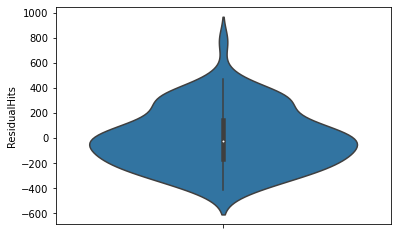

In [13]:
sns.violinplot(y=reg_HOF_stats['ResidualHits'])

In this scatter plot below, we plotted each of the HOF player's residuals to see how well they overperformed/underperformed. The ones marked in green are players who performed much better than what was expected from the linear model. Jeter performed somewhat better than what was expected, but there are still many players whose residuals are much higher than his. Thus, his "Hitting for Contact" statistics do not justify his 99.7% approval rating into the MLB HOF. 

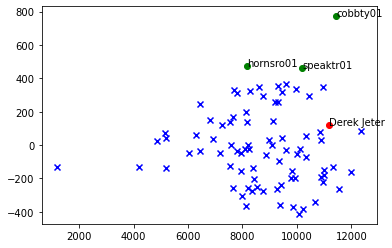

In [14]:
for k1,v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualHits'],c='red')
        plt.annotate('Derek Jeter',(v1['AB'],v1['ResidualHits']))
    elif (v1['ResidualHits'] > 400):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualHits'],c='green')
        plt.annotate(v1['playerID'],(v1['AB'],v1['ResidualHits']))
    else:
        plt.scatter(marker='x',x=v1['AB'],y=v1['ResidualHits'],c='blue')

# Criteria 2: Hitting for Power

The second criteria to examine is to check whether Derek Jeter was significantly better at hitting for power when compared to other hall of famers in the MLB. Similar to above, a player who has been at bat more is likely going to have more doubles/triples/homeruns across their career than those players who have less. As a result, we determine a player's ratio of total bases to the number of times they are at bat. 

However, our dataframe gives us the number of hits a player has, but not if they scored a double/triple/homerun. Thankfully, they give us the number of doubles/triples/homeruns they scored, so to calculate the number of singles, we subtract the number of doubles/triples/homeruns from the number of hits. We then take doubles/triples/homeruns and multiply them by 2/3/4 respectively. This will allow us to accurately see which players were the best at hitting for power in the HOF.  

In [15]:
# Creating a new column in the Dataframe called singles (SGL), derived by subtracting doubles, triples, 
# and homeruns from the total amount of hits a player has
reg_HOF_stats['SGL'] = reg_HOF_stats['H'] - reg_HOF_stats['DBL'] - reg_HOF_stats['TPL'] - reg_HOF_stats['HR']

# calculate total-bases scored using singles, doubles, triples, homeruns, and walks 
# (includes base-on-ball and hit-by-pitch)
reg_HOF_stats['TB'] = reg_HOF_stats['SGL'] + (2*reg_HOF_stats['DBL']) + (3*reg_HOF_stats['TPL'])+(4*reg_HOF_stats['HR']) + reg_HOF_stats['BB'] + reg_HOF_stats['HBP']


reg_HOF_stats.drop(['SGL','DBL','TPL','BB','HBP'],axis=1,inplace=True)

Below, we created a scatter plot and checked where Derek Jeter fit on it. In addition, we added a linear regression model. From the scatterplot, it seems that Jeter actually performed BELOW what the model predicts. Not a good look to justify his 99.7 approval rating!

cobbty01: Ty Cobb
hornsro01: Roger Horsnby
cobbTy01: Ty Cobb

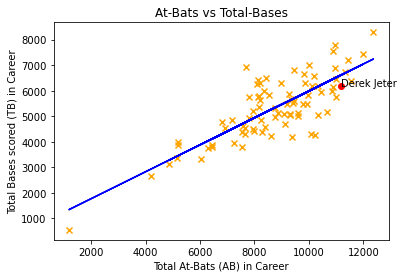

In [16]:
for k2,v2 in reg_HOF_stats.iterrows():
    #If the player is Jeter, mark his point as red
    if (v2['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v2['AB'],y=v2['TB'],c='red')
        plt.annotate('Derek Jeter',(v2['AB'],v2['TB']))
    else:
        plt.scatter(marker='x',x=v2['AB'],y=v2['TB'],c='orange')

#Create scatter plot using at-bat for x-axis, total-bats for y-axis. 
x = reg_HOF_stats['AB']
y = reg_HOF_stats['TB']
m,b = np.polyfit(x,y,1)

#Show plot
plt.plot(x, m*x+b, '-', color='blue')
plt.xlabel('Total At-Bats (AB) in Career')
plt.ylabel('Total Bases scored (TB) in Career')
plt.title('At-Bats vs Total-Bases')
plt.show()

Just like in criteria 1, we created a linear model for total bases. We then made a violin plot to check if the residuals are normally distributed. The violin plot below is shown to have a normal curve.

In [17]:
#Creates a linear regression model using at bat and total bases
x2 = pd.DataFrame(reg_HOF_stats['AB'])
y2 = reg_HOF_stats['TB']

regBases = linear_model.LinearRegression().fit(x2,y2)
print("Coefficient of linear model: ", regBases.coef_[0], " Intercept of linear model: ", regBases.intercept_)

Coefficient of linear model:  0.5272454237023846  Intercept of linear model:  720.4727204024402


In [18]:
#Gets the residual bases, adds them to the dataframe. 
reg_HOF_stats['PredictedBases'] = regBases.predict(x2)
reg_HOF_stats['ResidualBases'] = reg_HOF_stats['TB'] - reg_HOF_stats['PredictedBases']
reg_HOF_stats.head(10)

,playerID,Vote%,POS,GP,PO,A,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases
0,cobbty01,98.230088,OF,2954,6507,410,278.0,4189,11436,117,896.0,3416.655124,772.344876,7197.0,6750.051386,446.948614
12,hornsro01,78.111588,SS,2164,4495,6842,500.0,2930,8173,301,135.0,2458.995738,471.004262,5798.0,5029.649568,768.350432
6,speaktr01,82.089552,OF,2717,6935,462,224.0,3514,10195,117,432.0,3052.433458,461.566542,6585.0,6095.739815,489.260185
5,lajoina01,83.582090,1B,2441,8520,6691,518.0,3243,9590,82,380.0,2874.871726,368.128274,5122.0,5776.756334,-654.756334
99,gwynnto01,97.614679,OF,2326,4512,160,62.0,3141,9288,135,319.0,2786.237606,354.762394,5073.0,5617.528216,-544.528216
11,keelewi01,75.547445,3B,2104,3170,363,167.0,2932,8591,33,495.0,2581.674752,350.325248,4215.0,5250.038155,-1035.038155
38,musiast01,93.235294,OF,2907,12439,818,142.0,3630,10972,475,78.0,3280.475549,349.524451,7786.0,6505.409509,1280.590491
10,collied01,77.737226,2B,2701,6621,7716,452.0,3315,9949,47,741.0,2980.234803,334.765197,5844.0,5966.037441,-122.037441
36,willite01,93.377483,OF,2152,4158,142,113.0,2654,7706,521,24.0,2321.935691,332.064309,6944.0,4783.425955,2160.574045
9,sislege01,85.766423,1B,2036,18914,1573,274.0,2812,8267,102,375.0,2486.583842,325.416158,4391.0,5079.210638,-688.210638


<AxesSubplot:ylabel='ResidualBases'>

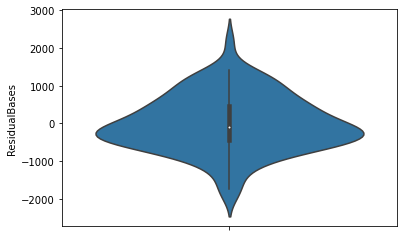

In [19]:
#Plots the residual bases
sns.violinplot(y=reg_HOF_stats['ResidualBases'])

Next, we check compare Jeter's residuals to the rest of the hall of famers. As expected from the scatter plot, many players outperformed him and he also performed below his expectations. So far, his statistics haven't been that amazing to warrant his insanely high approval rating, so the next two criteria are really going to have to make up for it!

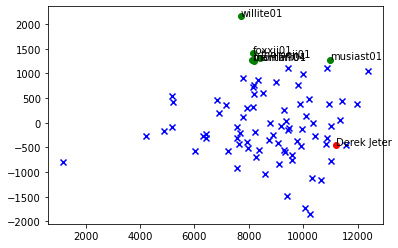

In [20]:
for k1,v1 in reg_HOF_stats.iterrows():
    #Color Jeter's point in red to differentiate from others
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualBases'],c='red')
        plt.annotate('Derek Jeter',(v1['AB'],v1['ResidualBases']))
    #Color overperformer's in green to compare them to Jeter
    elif (v1['ResidualBases'] > 1250):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualBases'],c='green')
        plt.annotate(v1['playerID'],(v1['AB'],v1['ResidualBases']))
    #Put rest in blue
    else:
        plt.scatter(marker='x',x=v1['AB'],y=v1['ResidualBases'],c='blue')

In [21]:
for i,r in reg_HOF_stats.iterrows():
    if r['playerID'] == 'jeterde01':
        print("Jeter's total hits residual was " +str(r['ResidualHits']) +" and his total Bases residual was " +str(r['ResidualBases']))

Jeter's total hits residual was 119.07607776933901 and his total Bases residual was -449.9852387506353


# Jeter's Power Hitting Analyzed

As seen by the residual plot, we notice that Jeter's actual base total was below his expected by 449.985. After running a linear regression model, we see that, for a Hall of Famer given the amount of at-bats (x-axis on our original scatter plot) Jeter was, he was expected to accumulate 449.985 more bases than he actually did. This shows that, in terms of power hitting, Jeter does not perform exceptionally when compared ot other hall of famers. He falls below the regression line, and there are many other players (willite01: Ted Williams and musiast01: Stan Musial to name a few) who far exceeded their expected bases by having very high residual numbers. This would suggest that these players were actually bettter "power hitters" than Derek Jeter. In out above scatterplot of the residuals vs at-bats, we are ables to see even more clearly that Jeter does not stand out or outperform a large percentage of hall of famers in the category of "power hitting". Although his cumulative amount of total bases was quite high, much of that can be attributed to the large amount of games he played and at-bats he was given, which does not necessarily mean he was the best "power hitter". 

# Criteria 3: Comparing Jeter's Fielding

The third criteria we will examine is how Derek Jeter's fielding comapres to other fielders. This will be done by first calculating the total outs that each Hall of Famer was responsible for. This will be done by combining each player's putouts (outs he was physically responsible for) with assists (times he aided in getting the out). We also create another column for fielding percentage, which represents the percentage of times a player recorded an out when he was given a chance (Outs/Outs+Errors). 

To compare Derek Jeter's career fielding against other Hall of Famers, we will create a scatterplot with Games played on the x-axis, and total outs on the y-axis. We will then run a linear regression line through the data, adn see where Derek Jeter lies. This is a linear relationship, because the more games a player has been in, the more opportunities he was given to record an out, so we would expect players who have higher games played to have more outs. It is unfair to comapre two player's total outs if they did not have similar games played, since we will be penalizing palyers who played less games (not an indicator of true skill). Using our linear model, we can also find an expected number of outs for each Hall of Famer, and create residuals as well. If Derek Jeter truly was an exceptional shortstop fielder, we would expect him to have a higher residual, meaning he collected more outs than expected given his games played. 

In [22]:
#Calulate total outs by adding putouts and assists
reg_HOF_stats['OUTS'] = reg_HOF_stats['PO'] + reg_HOF_stats['A']
# Take errors by dividing outs by (outs + errors)
reg_HOF_stats['FieldPer'] = reg_HOF_stats['OUTS']/ (reg_HOF_stats['OUTS'] + reg_HOF_stats['E']) * 100
reg_HOF_stats.drop(['PO','A'],axis=1,inplace=True)
reg_HOF_stats.head(10)

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases,OUTS,FieldPer
0,cobbty01,98.230088,OF,2954,278.0,4189,11436,117,896.0,3416.655124,772.344876,7197.0,6750.051386,446.948614,6917,96.136206
12,hornsro01,78.111588,SS,2164,500.0,2930,8173,301,135.0,2458.995738,471.004262,5798.0,5029.649568,768.350432,11337,95.775957
6,speaktr01,82.089552,OF,2717,224.0,3514,10195,117,432.0,3052.433458,461.566542,6585.0,6095.739815,489.260185,7397,97.060753
5,lajoina01,83.582090,1B,2441,518.0,3243,9590,82,380.0,2874.871726,368.128274,5122.0,5776.756334,-654.756334,15211,96.706720
99,gwynnto01,97.614679,OF,2326,62.0,3141,9288,135,319.0,2786.237606,354.762394,5073.0,5617.528216,-544.528216,4672,98.690325
11,keelewi01,75.547445,3B,2104,167.0,2932,8591,33,495.0,2581.674752,350.325248,4215.0,5250.038155,-1035.038155,3533,95.486486
38,musiast01,93.235294,OF,2907,142.0,3630,10972,475,78.0,3280.475549,349.524451,7786.0,6505.409509,1280.590491,13257,98.940219
10,collied01,77.737226,2B,2701,452.0,3315,9949,47,741.0,2980.234803,334.765197,5844.0,5966.037441,-122.037441,14337,96.943674
36,willite01,93.377483,OF,2152,113.0,2654,7706,521,24.0,2321.935691,332.064309,6944.0,4783.425955,2160.574045,4300,97.439384
9,sislege01,85.766423,1B,2036,274.0,2812,8267,102,375.0,2486.583842,325.416158,4391.0,5079.210638,-688.210638,20487,98.680218


Slope of total outs:  2.738418402783206  Intercept of total outs:  3545.9543153955324


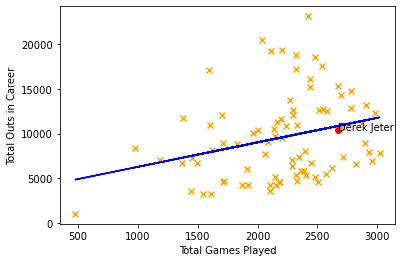

In [23]:
# Making a scatterplot of the number of games played vs. number of outs
for k1,v1 in reg_HOF_stats.iterrows():
    #If point ios Jeter, mark as red
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['GP'],y=v1['OUTS'],c='red')
        plt.annotate('Derek Jeter',(v1['GP'],v1['OUTS']))
    else:
        #If any other player, keep mark as orange
        plt.scatter(marker='x',x=v1['GP'],y=v1['OUTS'],c='orange')

#Create the linear regression
x = reg_HOF_stats['GP']
y = reg_HOF_stats['OUTS']
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, '-', color='blue')
plt.xlabel('Total Games Played')
plt.ylabel('Total Outs in Career')

print("Slope of total outs: ",m, " Intercept of total outs: ",b)

# Scatterplot Results

As we can see from the scatterplot above, Derek Jeter falls below the regression line. He is rather far along the x-axis, due to his large amount of games played (2747), however he was not above expected in regards to total outs. After looking at the graph, we want to examine further to make sure a linear relationship exists. The scatterplot does show a general upward trend, and baseball logic tell us that more games played means more opportunities for a player to get outs. Thus, we decided to use statsmodel to get the p-value of our lineer model. We also create our linear model, and look at our coeffieient to see if it mirrors a linear relationship. We will then use the model to find expected and residual values for each of the hall of famers, putting them in our dataframe. We will also use our residuals to see if the plot is normally distrubuted, giving us affirmation that our use of a linear regression was justified. 

The four assumptions we make when we run a linear regression are 

1) That a linear relationship exists

2) Independence of residuals

3) Constant Variance of residuals (this is known as 'Homoscedasticity')

4) That the residuals are normally distributed (this is known as 'Normality')



In [24]:
x = pd.DataFrame(reg_HOF_stats['GP'])
y = reg_HOF_stats['OUTS']


X = sm.add_constant(x)
model = sm.OLS(y, X).fit() 

reg_HOF_stats['PredictedOuts'] = model.predict(X)

reg_HOF_stats['ResidualOuts'] = reg_HOF_stats['OUTS'] - reg_HOF_stats['PredictedOuts']
reg_HOF_stats.sort_values(by='ResidualOuts',ascending=False,inplace=True)
reg_HOF_stats.head(10)

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases,OUTS,FieldPer,PredictedOuts,ResidualOuts
91,murraed02,85.282258,1B,2422,168.0,3255,11336,504,110.0,3387.306078,-132.306078,6748.0,6697.326843,50.673157,23136,99.279094,10178.403687,12957.596313
9,sislege01,85.766423,1B,2036,274.0,2812,8267,102,375.0,2486.583842,325.416158,4391.0,5079.210638,-688.210638,20487,98.680218,9121.374183,11365.625817
116,bagweje01,86.199095,1B,2112,129.0,2314,7797,449,202.0,2348.643323,-34.643323,5742.0,4831.405289,910.594711,19251,99.334365,9329.493982,9921.506018
20,foxxji01,79.203540,C,2200,192.0,2646,8134,534,87.0,2447.549610,198.450390,6421.0,5009.086997,1411.913003,19359,99.017953,9570.474802,9788.525198
27,terrybi01,77.380952,1B,1594,139.0,2193,6428,154,56.0,1946.854877,246.145123,3798.0,4109.606304,-311.606304,17110,99.194156,7910.993249,9199.006751
65,mccovwi01,81.411765,1B,2320,256.0,2211,8197,521,26.0,2466.039509,-255.039509,5633.0,5042.303458,590.696542,18803,98.656803,9899.085010,8903.914990
50,bankser01,83.812010,SS,2476,261.0,2583,9421,512,50.0,2825.271838,-242.271838,5539.0,5687.651857,-148.651857,18561,98.613325,10326.278281,8234.721719
73,carewro01,90.519187,2B,2321,260.0,3053,9315,92,353.0,2794.161849,258.838151,5041.0,5631.763842,-590.763842,17219,98.512501,9901.823428,7317.176572
87,perezto01,77.154309,1B,2539,240.0,2732,9778,379,49.0,2930.047934,-198.047934,5500.0,5875.878473,-375.878473,17567,98.652215,10498.798640,7068.201360
118,rodriiv01,76.018100,C,2436,143.0,2844,9592,311,127.0,2875.458707,-31.458707,5022.0,5777.810825,-755.810825,16155,99.122592,10216.741545,5938.258455


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   OUTS   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     7.008
Date:                Mon, 10 May 2021   Prob (F-statistic):            0.00975
Time:                        22:29:14   Log-Likelihood:                -816.40
No. Observations:                  83   AIC:                             1637.
Df Residuals:                      81   BIC:                             1642.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3545.9543   2328.633      1.523      0.132   -1087.294    8179.203
GP             2.7384      1.034      2.647      0.010       0.680       4.797
==============================================================================
Omnibus:                        8.714   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                9.087
Skew:                           0.810   Prob(JB):                       0.0106
Kurtosis:                       3.017   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Results from our Model and p-value

After running our linear regression and creating our residual column (actual-expected outs), we see from our statsmodel summary that our p-value is .01, which means we can reject our null hypothesis that no relaitonship exists between games played and outs. We can also see from our summary that we have a coefficient of 2.73, which means that every time games played increases by 1, we expect to see an outs increase of 2.73 for a given player. From the scatterplot, the p-value, and the coefficient, we can be confident that a linear relationship does exist between games played and outs.

<AxesSubplot:title={'center':'Distribution of Residual Outs'}, ylabel='ResidualOuts'>

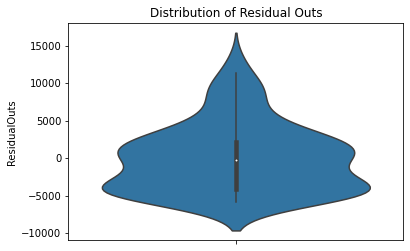

In [26]:
ax = sns.violinplot(y=reg_HOF_stats['ResidualOuts'])
ax.set_title("Distribution of Residual Outs")
ax

The plot is centered around 0 and somewhat symmetrical, however there are some dips proving that it is not very normally distributed. This may because we are examining all the hall of famers in this plot (regardless of position) even though some positions may have more opportunities during a game to record outs than others. Thus, the data could be skewed by these players at "high action" positions since they would have higher out totals

# Filtering by Position: A Better Approach?

After some discussion, we realized that comparing Jeter's total outs to all other Hall of Famers may not be the best way to determine his effectiveness as a fielder. The amount of outs a player can record is very dependant on how many times the ball gets hit to his area, which is not evenly distributed in baseball among the positions. Some positions may get the ball hit to their spot more than others, which will skew the amount of outs they will get. It would be unfair to compare Jeter's outs to other players who recieve more opportunities throughout the course of a game. Thus, a better way to determine Jeter's fielding would be to compare his outs against all other players at his position (shortstop), since they are more likely to have similar opportunities per game.

We go about this by grouping the players by position, and performing the same scatterplot as before with only the shortstop group. Although it is a small sample size, we can supplement our previous plot with this new one to get a bettter feel for Jeter's true abilities as a shortstop. We once again run a linear regression trhough this data, since more games played will equal more opportunities, and thus a higher number of total outs. So, we expect there to be a linear relationship between games played and outs recorded. 

Slope of SS total outs:  7.236469592591715  Intercept of SS total outs:  -6328.821868203592


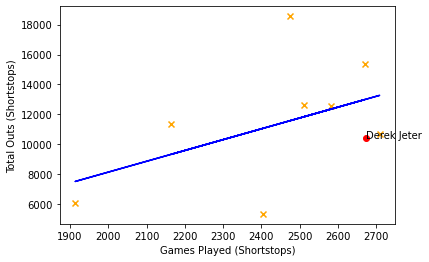

In [27]:
#Make a new dataframe from only shortstops
SS_reg_HOF_stats = reg_HOF_stats.groupby(by="POS")
SS = pd.DataFrame(SS_reg_HOF_stats.get_group('SS'))

# Making a scatterplot of the shortstop total outs
for k1,v1 in SS.iterrows():
    #Mark Jeter as red
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['GP'],y=v1['OUTS'],c='red')
        plt.annotate('Derek Jeter',(v1['GP'],v1['OUTS']))
    else:
        #Mark rest as orange
        plt.scatter(marker='x',x=v1['GP'],y=v1['OUTS'],c='orange')

#Create the scatter plot
x = SS['GP']
y = SS['OUTS']
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, '-', color='blue')
plt.xlabel('Games Played (Shortstops)')
plt.ylabel('Total Outs (Shortstops)')
print("Slope of SS total outs: ",m, " Intercept of SS total outs: ",b)

Although we have now filtered by position, we see that Derek Jeter still falls below the regression line when compared to other Hall of Famers at his position. This means that the total amount of outs he recorded was less than what was expected for a player at his poistion, given the amount of games he played. The data looks relatively linear, although we do have a small sample size which can skew the data because of outliers. We will now run a linerar regression and use this to get the expected outs for each of the Hall of Fame shortstops given their games played. We then will create another column for their residual outs. 

In [28]:
#Create the linear regresson using statsmodel instead of sklearn, since statsmodel has a builtin function to get the pvalues.
x = pd.DataFrame(SS['GP'])
y = SS['OUTS']

X = sm.add_constant(x)
model = sm.OLS(y, X).fit() 

#Get the predicted outs from the dataframe.
SS['PredictedOuts'] = model.predict(X)

#Calculate the residual outs by taking the actual outs and subtracting the predicted outs.
SS['ResidualOuts'] = SS['OUTS'] - SS['PredictedOuts']
SS.sort_values(by='ResidualOuts',ascending=False,inplace=True)
SS.head(20)

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases,OUTS,FieldPer,PredictedOuts,ResidualOuts
50,bankser01,83.812010,SS,2476,261.0,2583,9421,512,50.0,2825.271838,-242.271838,5539.0,5687.651857,-148.651857,18561,98.613325,11588.676843,6972.323157
25,maranra01,82.936508,SS,2670,711.0,2605,10078,28,291.0,3018.095073,-413.095073,4301.0,6034.052100,-1733.052100,15380,95.581381,12992.551944,2387.448056
12,hornsro01,78.111588,SS,2164,500.0,2930,8173,301,135.0,2458.995738,471.004262,5798.0,5029.649568,768.350432,11337,95.775957,9330.898330,2006.101670
90,smithoz01,91.737288,SS,2511,281.0,2460,9396,28,580.0,2817.934576,-357.934576,4189.0,5674.470722,-1485.470722,12624,97.822549,11841.953279,782.046721
60,aparilu01,84.615385,SS,2583,366.0,2677,10230,83,506.0,3062.705624,-385.705624,4267.0,6114.193405,-1847.193405,12564,97.169374,12362.979089,201.020911
18,traynpi01,76.859504,SS,1914,348.0,2416,7559,58,158.0,2278.792593,137.207407,3792.0,4705.920878,-913.920878,6062,94.570983,7521.780932,-1459.780932
85,yountro01,77.464789,SS,2709,305.0,3142,11008,251,271.0,3291.041205,-149.041205,5744.0,6524.390345,-780.390345,10705,97.229791,13274.774258,-2569.774258
8630,jeterde01,NaN,SS,2674,254.0,3465,11195,260,358.0,3345.923922,119.076078,6173.0,6622.985239,-449.985239,10425,97.621500,13021.497822,-2596.497822
119,jonesch06,97.156398,SS,2405,243.0,2726,8984,468,150.0,2697.016505,28.983495,6285.0,5457.245607,827.754393,5352,95.656836,11074.887502,-5722.887502


Text(0.5, 1.0, 'Distribution of Shortstop Residual Outs')

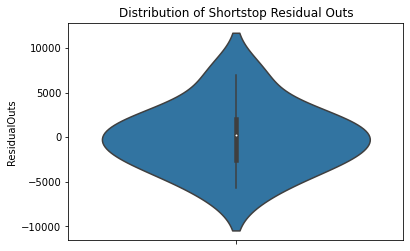

In [34]:
#Scatter plot of the residuals for shortstops
ax2 = sns.violinplot(y=SS['ResidualOuts'])
ax2.set_title("Distribution of Shortstop Residual Outs")

This is much better, as only examining the shortstops creates a much more normally distributed residual plot. It is once again symmetrical and centered around 0. 

# How Jeter's Fielding Compared
We sorted our dataframe by the residual outs in descending outs, and noticed that Jeter had the second lowest residual outs among HOF shortstops (-2596.49). This means he recorded 2596.49 less outs than expected given the amount of games he played. We also see from our linear regression that the coefficient is 7.236, which was much higher than the overall (not position filtered). This means that for each increase in games played, on average, a HOF shortstops outs increase by 7.23. This shows that shortsotp is actually one of the higher-action positions, so Derek Jeter was in fact given more opportunities per game than the average player due to his position.

However, something to note is that there are only nine shortstops listed in the database. Since the sample size is so small, it may not accurately represent the relationship between shortstops games played and shortstops number fielding. This motivated us to use all players and only shortstops, so we can see how Jeter compares. 

After comparing Jeter's fielding against all palyers, and then just players at his position, he has performed below-expected in terms of getting outs (fileding) when compared to Hall of Fame palyers, since he fell below the regression line on both scatter plots. This does not help his case of being the best position player of all time...

# Criteria 4: Speed

The first criteria we want to examine is whether Derek Jeter was significantly better at stealing bases (i.e. exhibiting speed) than all other hall of famers. Obviously, the fastest player is not necesssarily the player who accumaltes the most stolen bases over his career, since much of that is dependant on how many games he played as well as some intangible skills like game-sense (i.e. knowing when and when not to attempt to steal base) and risk aversion. The more games played, the more opportunties a plyer had to steal bases. Thus, you would expect to see more stolen bases from a player who has played more games. In baseball, Stolen-Bases (labeled as SB) in our DataFrame measures exactly that: The number of bases a player has stolen.

We decided to create a scatterplot with Stolen-Bases on the x-axis and Games-Played on the y-axis. We will plot each of the Hall Of Famers, including Derek Jeter. Since we know there is a linear relationship between the two (more opportunities/games-played = more stolen bases) we can run a linear regression to see where Derek Jeter lies in comparison. This is very similar to what we did in project 2, as we are examining the "expected" amount of hits a player should get given the amount At-Bats. If Derek actually was one of the best offensive players ever, we would expect him to outperform the expected amount of stolen-bases by a large margin.

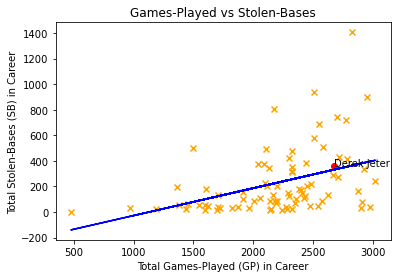

0.21420098941434468 -241.49449047882467


In [30]:
# Making a scatterplot of Games-Played vs Stolen-Bases
for k1,v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['GP'],y=v1['SB'],c='red')
        plt.annotate('Derek Jeter',(v1['GP'],v1['SB']))
    else:
        plt.scatter(marker='x',x=v1['GP'],y=v1['SB'],c='orange')

x = reg_HOF_stats['GP']
y = reg_HOF_stats['SB']
m,b = np.polyfit(x,y,1)

plt.xlabel('Total Games-Played (GP) in Career')
plt.ylabel('Total Stolen-Bases (SB) in Career')
plt.title('Games-Played vs Stolen-Bases')
plt.plot(x, m*x+b, '-', color='blue')
plt.show()
print(m,b)

# Scatterplot Results
As we can see from the scatterplot above, Derek Jeter is found a tad above the regression line. He is rather far along the x-axis, due to his large amount of games played (2747) and has slightly more stolen-bases than was expected of him. After looking at the graph, it was apparent that there was a linear relationship between the two parameters -- as a player's amount of games-played increased, so did their amount of stolen-bases. We will also use our residuals to see if the plot is normally distrubted, giving us affirmation that our use of a linear regression was justified.

In [31]:
reg_HOF_stats['PredictedStolen'] = m * reg_HOF_stats['GP'] + b
reg_HOF_stats['ResidualStolen'] = reg_HOF_stats['SB'] - reg_HOF_stats['PredictedStolen']
reg_HOF_stats.sort_values(by='ResidualStolen',ascending=False,inplace=True)
reg_HOF_stats.head()

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases,OUTS,FieldPer,PredictedOuts,ResidualOuts,PredictedStolen,ResidualStolen
101,henderi01,94.805195,OF,2826,141.0,3055,10961,297,1406.0,3277.247153,-222.247153,6876.0,6499.609810,376.390190,6599,97.908012,11284.724722,-4685.724722,363.837506,1042.162494
64,brocklo01,79.746835,OF,2507,196.0,3023,10332,149,938.0,3092.641651,-69.641651,5048.0,6167.972438,-1119.972438,4536,95.857988,10411.169251,-5875.169251,295.507390,642.492610
117,raineti01,85.972851,2B,2176,61.0,2605,8872,170,808.0,2664.145573,-59.145573,5143.0,5398.194119,-255.194119,4557,98.679082,9504.752760,-4947.752760,224.606862,583.393138
0,cobbty01,98.230088,OF,2954,278.0,4189,11436,117,896.0,3416.655124,772.344876,7197.0,6750.051386,446.948614,6917,96.136206,11635.242277,-4718.242277,391.255232,504.744768
93,molitpa01,85.177866,2B,1495,208.0,3319,10835,234,504.0,3240.267355,78.732645,5995.0,6433.176886,-438.176886,6747,97.009346,7639.889828,-892.889828,78.735989,425.264011


<AxesSubplot:ylabel='ResidualStolen'>

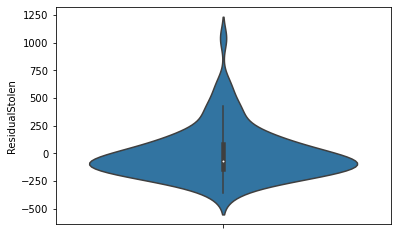

In [32]:
sns.violinplot(y=reg_HOF_stats['ResidualStolen'])

In [33]:
reg_HOF_stats.loc[reg_HOF_stats['playerID'] == 'jeterde01'] #observe that Jeter's ResidualStolen == 26.721045

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases,OUTS,FieldPer,PredictedOuts,ResidualOuts,PredictedStolen,ResidualStolen
8630,jeterde01,NaN,SS,2674,254.0,3465,11195,260,358.0,3345.923922,119.076078,6173.0,6622.985239,-449.985239,10425,97.6215,10868.485124,-443.485124,331.278955,26.721045


In [34]:
better_stolen = len(reg_HOF_stats.loc[reg_HOF_stats['ResidualStolen'] > 26.721045]) # number of people with higher residual than Jeter
total_HOF = len(reg_HOF_stats)

better_stolen_percent = better_stolen/total_HOF
print(better_stolen_percent) # 31% of people 'outperformed' Jeter

0.3132530120481928


# Speed - Jeter vs other HOF Players

Derek Jeter was only 'out-performed' by 31% of players in the Hall of Fame -- this means that he performed better than 69% of Hall of Famers. While this is impressive in and of itself, we are not trying to find out whether or not Jeter was better than *most* Hall of Fame players, but whether or not Jeter was the *best* HOF player, as is indicated/perceived from his 99.7% approval rating.

As stated in the beginning of the Criteria 4 section, we would expect Jeter to 'out-perform' what was expected of a Hall of Fame player with his amount of games -- since he beat this expectation by a slim margin and there are other players that have handidly beat their expected amount of stolen-bases for the amount of games they have played.

# Concluding on Jeter's Statistics
After examining Jeter on the four main aspects of baseball (Hitting, Power Hitting, Fielding, and Baserunning) we find that he does not out-perform other hall of famers in any of the determined categories. In our first category, overall htting ability, we plotted each Hall of Famer on a scatter plot for at-bats versus hits. We then ran a linear regression through the plot and found that Derek Jeter lied barely above the regression line, with a small positive residual. However, there were many other players who had much higher residuals than him. This trend continued in the second examined category, "power hitting". To measure this power, we calculated each Hall of Famer's total bases, weighting stronger hits with their associated base count (Homerun = 4, triple = 3, double = 2, single = 1). This will better highlights players who hit the ball further, since they had more time to run to more bases. In the scatterplot of total bases vs at-bats, Jeter lied slightly below the regression line, and even had a negative residual. In the third category, we examined fielding by looking at the total "outs" a plyer was responsible for, and plotted htem against a players games played. WAfter originally plotting Jeter against all other hall of famers, we decided this may be a little unfair, since certain positions are more likely to get the ball than others. Thus, we decided to only compare Jeter's fielding to other shortstops in the hall of fame, to make sure players at other positions did not skew our regression. After plotting the shortstops on their outs vs games played, we see that Jeter once again fell below the regression line, meaning he accumulated less outs than expected compared to other hall of fame shortstops, given teh number of games he played. However, this line may not have been as accurate, as our sample size (9) was so small for hall of fame shortstops, so outliers have a much higher affecto of skewing the data. Altthough, the graph did show us that there were many shortstops that "outperformed" Jeter in terms of accumulated outs. Finally, we examined baserunning by plotting stolen bases versus games played, since this is the best stat to show a player's true speed. Although Jeter was above the regression line on the scatterplot, his residual was not very high, and many other players had much higher residuals. This is all to say that, after solely examining Derek Jeter's stats in different categories against other Hall of Famers, we have no reason to believe he was the best position player ever, or worthy of a 99.7% approval rating. This is not to say that Derek Jeter should not have been a Hall of Famer, because he still had exceptional statistics. However, when measured up against the "best of the best" (other Hall of Famers), Jeter's stats protray him as a rather average Hall of Famer. 

This leads us to believe that voters may not only be voting on stats alone. Baseball is a game in which players can have a large impact outside of statistics, adn can be great because of that. This can include leadership, which can allow a player to motivate the rest of the team and help lead to more wins. It can also include attitude, since a plyer with a better attitude can raise team morale. So, we wanted to try our best to examine whether Derek Jeter could have exhibited any of those qualities, by taking alook at the Yankee's organization with and without Jeter. The ultimate goal of baseball is to win, so we will attempt to measure those "intangible" factors by seeing if the Yankees were more likely to win with Derek Jeter on their team. This will be done by examining the Yankees win rate 20 years before Derek Jeter arrived, and then the 20 year period in which he played, and seeing how the two "eras" compared. Given his high approval rate, we would expect the Yankees oranization to perform significantly better when Jeter was apart of the team. 

# Jeter's Impact on the Yankee's Wins

In [36]:
Yankees_query = 'SELECT yearID, (W*1.0/(L*1.0+W*1.0)*100.0) as Win_Per from Teams WHERE teamID="NYA" and yearID > 1974 and yearID < 2015'
Yankees_win = pd.read_sql(Yankees_query,conn)

Yankees_win_before = Yankees_win.head(20)
Yankees_win_before = Yankees_win_before.reset_index(drop=True)
Yankees_win_before['year'] = Yankees_win_before.index

Yankees_win_after = Yankees_win.tail(20)
Yankees_win_after = Yankees_win_after.reset_index(drop=True)
Yankees_win_after['year'] = Yankees_win_after.index

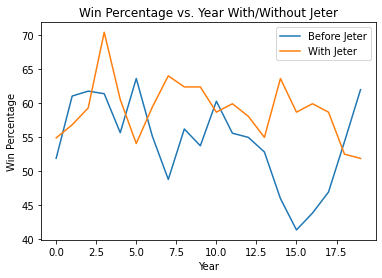

In [37]:
fig, ax = plt.subplots()

ax.plot(Yankees_win_before['year'], Yankees_win_before['Win_Per'], label='Before Jeter')
ax.plot(Yankees_win_after['year'], Yankees_win_after['Win_Per'], label='With Jeter')
plt.title('Win Percentage vs. Year With/Without Jeter')
plt.xlabel('Year')
plt.ylabel('Win Percentage')
ax.legend(loc = 'upper right')
plt.show()